In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [2]:
bb = pd.read_csv("HotStuff.csv")
bb.tail()

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
327890,https://www.billboard.com/charts/hot-100/2018-...,10/20/2018,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13
327891,http://www.billboard.com/charts/hot-100/1977-0...,5/21/1977,22,I Wanna Get Next To You,Rose Royce,I Wanna Get Next To YouRose Royce,1,10.0,10,13
327892,http://www.billboard.com/charts/hot-100/1981-0...,5/23/1981,22,I Can't Stand It,Eric Clapton And His Band,I Can't Stand ItEric Clapton And His Band,1,12.0,10,13
327893,http://www.billboard.com/charts/hot-100/1973-0...,9/29/1973,22,Here I Am Come & Take Me,Al Green,Here I Am Come & Take MeAl Green,1,16.0,10,13
327894,https://www.billboard.com/charts/hot-100/2020-...,11/28/2020,22,Hawai,Maluma & The Weeknd,HawaiMaluma & The Weeknd,1,12.0,12,13


In [3]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   url                     327895 non-null  object 
 1   WeekID                  327895 non-null  object 
 2   Week Position           327895 non-null  int64  
 3   Song                    327895 non-null  object 
 4   Performer               327895 non-null  object 
 5   SongID                  327895 non-null  object 
 6   Instance                327895 non-null  int64  
 7   Previous Week Position  295941 non-null  float64
 8   Peak Position           327895 non-null  int64  
 9   Weeks on Chart          327895 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 25.0+ MB


<h2>DATA CLEANING</h2>
<b>To read the chart, it is a weekly chart consists of 100 songs from musicians. A total of 7 days from Sunday to next Saturday is used. For example, for week 6/11/2021 it starts on 31/10/2021.
The latest week in the Billboard 100 is 11/6/2021 and the earliest is 8/4/1958.</b>

The url column is of no use so will be removed. date data type will be changed to datetime.
The dataset will also be reduced from 2010-2020

In [4]:
bb.pop("url")

0         http://www.billboard.com/charts/hot-100/1965-0...
1         http://www.billboard.com/charts/hot-100/1965-0...
2         http://www.billboard.com/charts/hot-100/1965-0...
3         http://www.billboard.com/charts/hot-100/1965-0...
4         http://www.billboard.com/charts/hot-100/1965-0...
                                ...                        
327890    https://www.billboard.com/charts/hot-100/2018-...
327891    http://www.billboard.com/charts/hot-100/1977-0...
327892    http://www.billboard.com/charts/hot-100/1981-0...
327893    http://www.billboard.com/charts/hot-100/1973-0...
327894    https://www.billboard.com/charts/hot-100/2020-...
Name: url, Length: 327895, dtype: object

In [5]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   WeekID                  327895 non-null  object 
 1   Week Position           327895 non-null  int64  
 2   Song                    327895 non-null  object 
 3   Performer               327895 non-null  object 
 4   SongID                  327895 non-null  object 
 5   Instance                327895 non-null  int64  
 6   Previous Week Position  295941 non-null  float64
 7   Peak Position           327895 non-null  int64  
 8   Weeks on Chart          327895 non-null  int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 22.5+ MB


In [6]:
bb.isna().sum()

WeekID                        0
Week Position                 0
Song                          0
Performer                     0
SongID                        0
Instance                      0
Previous Week Position    31954
Peak Position                 0
Weeks on Chart                0
dtype: int64

<AxesSubplot:>

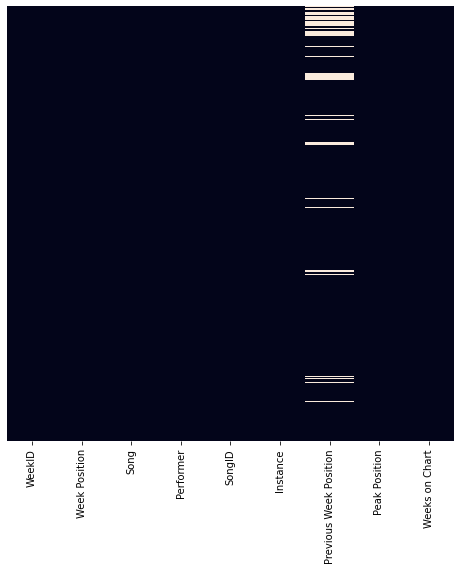

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(bb.isnull(),cbar=False,yticklabels=False)

<AxesSubplot:>

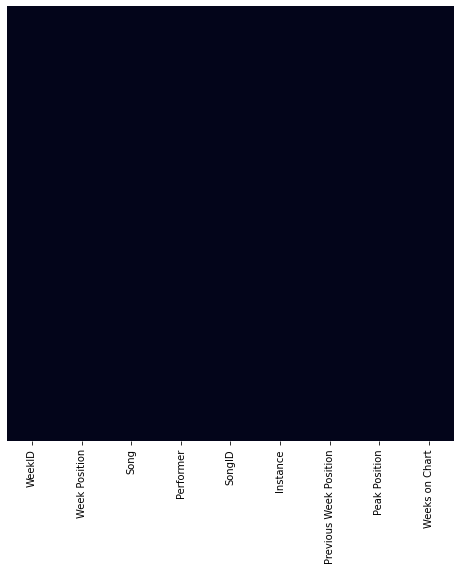

In [8]:
plt.figure(figsize=(8,8))
bb['Previous Week Position'].fillna(0,inplace=True)
sns.heatmap(bb.isnull(),cbar=False,yticklabels=False)

In [65]:
bb.isna().sum()

WeekID                    0
Week Position             0
Song                      0
Performer                 0
SongID                    0
Instance                  0
Previous Week Position    0
Peak Position             0
Weeks on Chart            0
year                      0
month                     0
day                       0
dtype: int64

In [9]:
bb["WeekID"] = pd.to_datetime(bb["WeekID"])

In [10]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  327895 non-null  datetime64[ns]
 1   Week Position           327895 non-null  int64         
 2   Song                    327895 non-null  object        
 3   Performer               327895 non-null  object        
 4   SongID                  327895 non-null  object        
 5   Instance                327895 non-null  int64         
 6   Previous Week Position  327895 non-null  float64       
 7   Peak Position           327895 non-null  int64         
 8   Weeks on Chart          327895 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 22.5+ MB


In [11]:
bb["year"] = bb['WeekID'].dt.year
bb['month'] = bb['WeekID'].dt.month
bb['day'] = bb['WeekID'].dt.day

In [12]:
bb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 327895 entries, 0 to 327894
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  327895 non-null  datetime64[ns]
 1   Week Position           327895 non-null  int64         
 2   Song                    327895 non-null  object        
 3   Performer               327895 non-null  object        
 4   SongID                  327895 non-null  object        
 5   Instance                327895 non-null  int64         
 6   Previous Week Position  327895 non-null  float64       
 7   Peak Position           327895 non-null  int64         
 8   Weeks on Chart          327895 non-null  int64         
 9   year                    327895 non-null  int64         
 10  month                   327895 non-null  int64         
 11  day                     327895 non-null  int64         
dtypes: datetime64[ns](1), float64(

<b>Now, the dataset will be filtered based on the first week of 2000 and the last week of year 2020.</b>

In [13]:
newbb = bb.loc[(bb['WeekID'] >= '2000-01-08') & (bb['WeekID'] <='2020-12-26')]
newbb.tail()

,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,year,month,day
327869,2010-05-15,21,I Made It (Cash Money Heroes),"Kevin Rudolf Featuring Birdman, Jay Sean, & Li...",I Made It (Cash Money Heroes)Kevin Rudolf Feat...,1,23.0,21,13,2010,5,15
327872,2008-09-20,21,Fall For You,Secondhand Serenade,Fall For YouSecondhand Serenade,1,24.0,21,13,2008,9,20
327873,2018-05-19,21,Friends,Marshmello & Anne-Marie,FriendsMarshmello & Anne-Marie,1,25.0,21,13,2018,5,19
327890,2018-10-20,22,God Is A Woman,Ariana Grande,God Is A WomanAriana Grande,1,21.0,8,13,2018,10,20
327894,2020-11-28,22,Hawai,Maluma & The Weeknd,HawaiMaluma & The Weeknd,1,12.0,12,13,2020,11,28


<h2>Descriptive Questions</h2>
<b>How many instances are there in the dataset?
How many musicians are in the chart?</b>

In [14]:
newbb.shape

(109500, 12)

In [15]:
newbb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109500 entries, 87 to 327894
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   WeekID                  109500 non-null  datetime64[ns]
 1   Week Position           109500 non-null  int64         
 2   Song                    109500 non-null  object        
 3   Performer               109500 non-null  object        
 4   SongID                  109500 non-null  object        
 5   Instance                109500 non-null  int64         
 6   Previous Week Position  109500 non-null  float64       
 7   Peak Position           109500 non-null  int64         
 8   Weeks on Chart          109500 non-null  int64         
 9   year                    109500 non-null  int64         
 10  month                   109500 non-null  int64         
 11  day                     109500 non-null  int64         
dtypes: datetime64[ns](1), float64

In [16]:
newbb.isna().sum()

WeekID                    0
Week Position             0
Song                      0
Performer                 0
SongID                    0
Instance                  0
Previous Week Position    0
Peak Position             0
Weeks on Chart            0
year                      0
month                     0
day                       0
dtype: int64

After the data cleaning has been done, it is then moved into a new csv file called Billboard3. It contains the information Billboard Hot 100 charts from year 2000 until 2020.

In [17]:
newbb.to_csv("billboard3.csv")

<h2> Exploratory Data Analysis</h2>
<b> 
Exploratory Questions:<br>
Which songs spent the longest time being in the chart?<br>
Which musicians spent the longest time being in the chart?<br>
Which musicians that ranks #1 the longest in the chart?<br>
</b>

In [18]:
newbb.describe()

,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,year,month,day
count,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000,109500.000000
mean,50.500000,1.168795,43.093927,39.857233,11.767726,2010.001826,6.533333,15.734247
std,28.866202,0.504115,30.068318,29.402516,9.387082,6.051707,3.447009,8.796556
min,1.000000,1.000000,0.000000,1.000000,1.000000,2000.000000,1.000000,1.000000
25%,25.750000,1.000000,16.000000,12.000000,5.000000,2005.000000,4.000000,8.000000
50%,50.500000,1.000000,42.000000,37.000000,10.000000,2010.000000,7.000000,16.000000
75%,75.250000,1.000000,69.000000,64.000000,17.000000,2015.000000,10.000000,23.000000
max,100.000000,10.000000,100.000000,100.000000,87.000000,2020.000000,12.000000,31.000000


In [19]:
newbb['Performer'].value_counts()

Taylor Swift                                                           991
Drake                                                                  735
Kenny Chesney                                                          695
Keith Urban                                                            673
Rascal Flatts                                                          602
                                                                      ... 
alt-J                                                                    1
Empire Cast Featuring Jussie Smollett                                    1
Kendrick Lamar Featuring Bilal, Anna Wise & Snoop Dogg                   1
Lil Yachty & Tierra Whack Featuring A$AP Rocky & Tyler, The Creator      1
Nicole Scherzinger                                                       1
Name: Performer, Length: 3947, dtype: int64

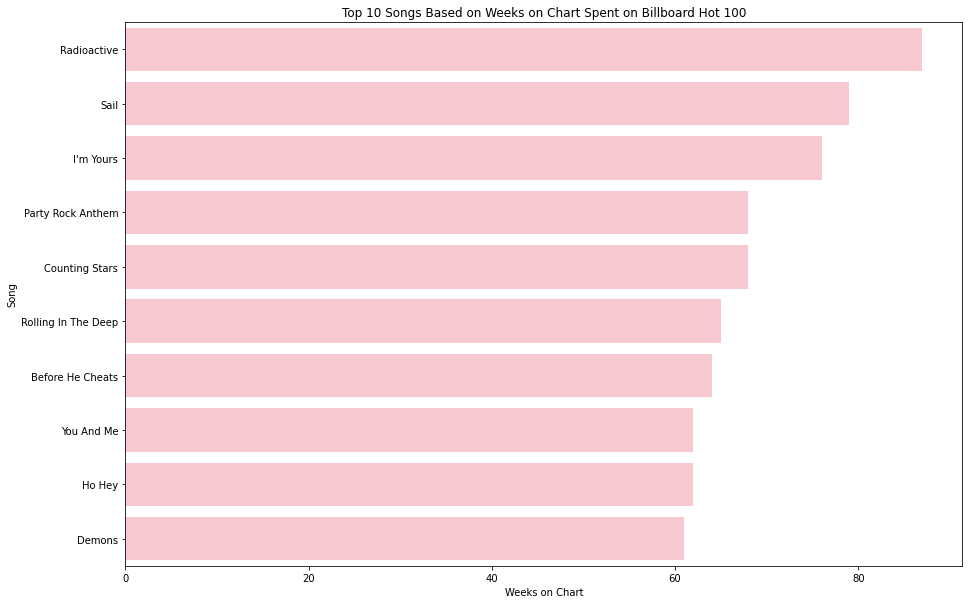

In [20]:
top10songs = newbb[["Performer", "Song","Weeks on Chart"]]

top10songs = top10songs.groupby(["Performer", "Song"]).max().nlargest(10, "Weeks on Chart").reset_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(y = "Song", x = "Weeks on Chart", data = top10songs, color = "pink" )
plt.title("Top 10 Songs Based on Weeks on Chart Spent on Billboard Hot 100")
plt.savefig("Top10SongsBasedonWeeksonChartSpentonBillboardHot100.png")

In [21]:
top10songs.head(10)

,Performer,Song,Weeks on Chart
0,Imagine Dragons,Radioactive,87
1,AWOLNATION,Sail,79
2,Jason Mraz,I'm Yours,76
3,LMFAO Featuring Lauren Bennett & GoonRock,Party Rock Anthem,68
4,OneRepublic,Counting Stars,68
5,Adele,Rolling In The Deep,65
6,Carrie Underwood,Before He Cheats,64
7,Lifehouse,You And Me,62
8,The Lumineers,Ho Hey,62
9,Imagine Dragons,Demons,61


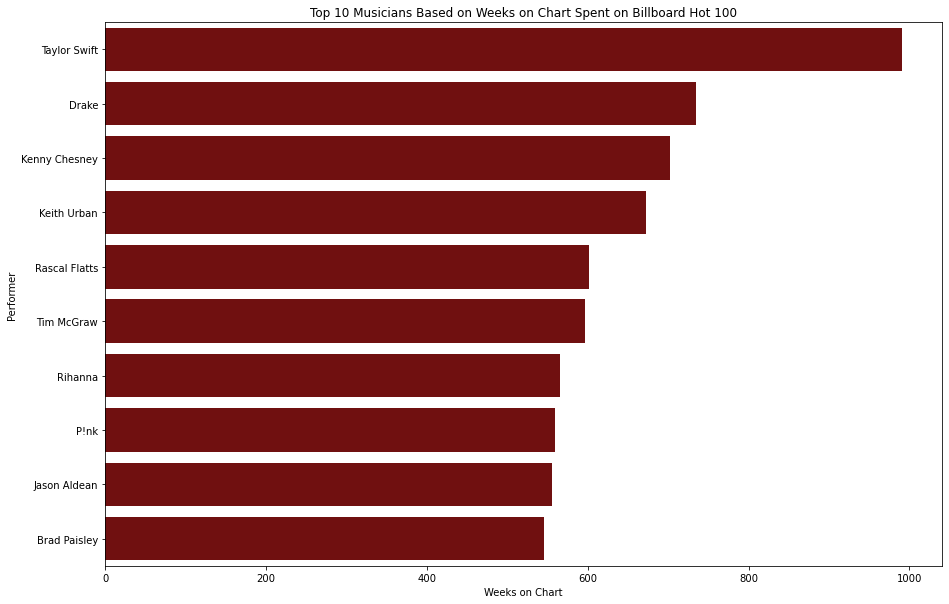

In [22]:
top10artist = newbb[["Performer", "Song","Weeks on Chart"]]
top10artist = top10artist.groupby(["Performer", "Song"]).max().reset_index()

top10artist = top10artist.groupby(["Performer"]).sum().nlargest(10, "Weeks on Chart").reset_index()

plt.figure(figsize=(15,10))
ax = sns.barplot(y = "Performer", x = "Weeks on Chart", data = top10artist, color = "maroon" )
plt.title("Top 10 Musicians Based on Weeks on Chart Spent on Billboard Hot 100")
plt.savefig("Top10MusiciansBasedonWeeksonChartSpentonBillboardHot100.png")

In [23]:
top10artist.head(10)

,Performer,Weeks on Chart
0,Taylor Swift,991
1,Drake,735
2,Kenny Chesney,702
3,Keith Urban,673
4,Rascal Flatts,602
5,Tim McGraw,597
6,Rihanna,566
7,P!nk,559
8,Jason Aldean,555
9,Brad Paisley,546


In [24]:
top1artists = newbb[newbb['Week Position']==1] # extract the artists who ranked first place
top1artists = top1artists.groupby('Performer').sum() # sum of the rank
top1artists[['Week Position']].sort_values('Week Position', ascending = False).head(10)

,Week Position
Performer,
Drake,30
The Black Eyed Peas,28
Adele,24
Mariah Carey,22
Usher,20
Taylor Swift,19
Lil Nas X Featuring Billy Ray Cyrus,19
Katy Perry,18
Ed Sheeran,17


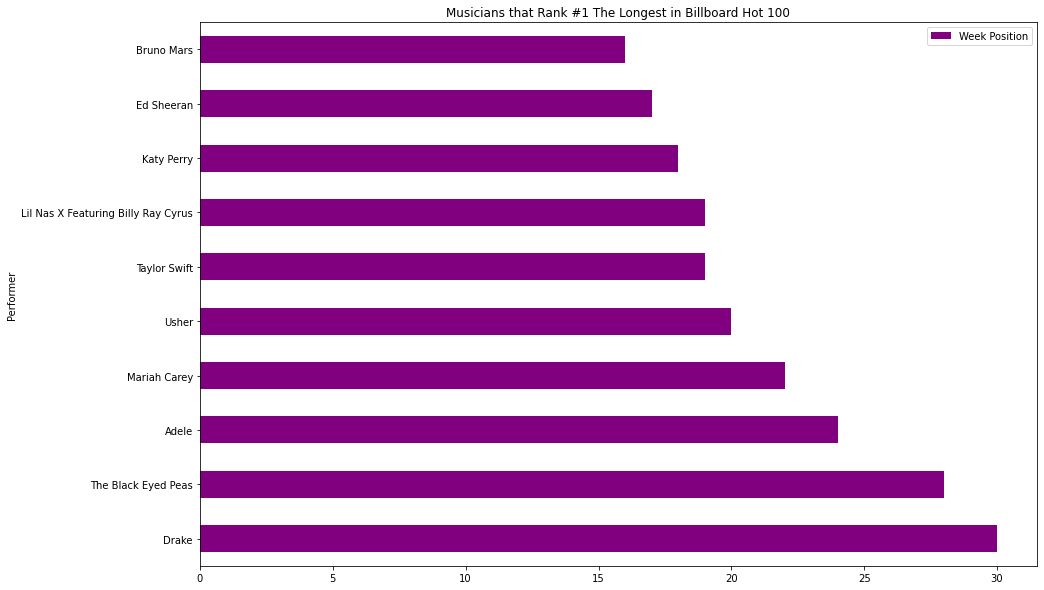

In [25]:
top1artists[['Week Position']].sort_values('Week Position', ascending = False).head(10).plot(title="Musicians that Rank #1 The Longest in Billboard Hot 100",kind="barh", figsize=(15,10), color="purple")
plt.savefig("Musicians that Rank #1 The Longest in Billboard Hot 100.png")

<h2>Predictive Questions: </h2>
<b>What is the most important features in predicting if a song would become a Number One Hit?</b>

In [26]:
spotify = pd.read_csv("Hot100AudioFeatures.csv")

In [27]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29503 entries, 0 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SongID                     29503 non-null  object 
 1   Performer                  29503 non-null  object 
 2   Song                       29503 non-null  object 
 3   spotify_genre              27903 non-null  object 
 4   spotify_track_id           24397 non-null  object 
 5   spotify_track_preview_url  14491 non-null  object 
 6   spotify_track_duration_ms  24397 non-null  float64
 7   spotify_track_explicit     24397 non-null  object 
 8   spotify_track_album        24391 non-null  object 
 9   danceability               24334 non-null  float64
 10  energy                     24334 non-null  float64
 11  key                        24334 non-null  float64
 12  loudness                   24334 non-null  float64
 13  mode                       24334 non-null  flo

Filtering any NaN values since NaN values cannot be an indicator of what makes a song number 1.

In [28]:
spotify = spotify.dropna()

These columns are changed so that it can be normalized later.

In [29]:
spotify['time_signature'] = spotify['time_signature'].astype(int).astype(str)
spotify['mode'] = spotify['mode'].astype(int).astype(str)
spotify['key'] = spotify['key'].astype(int).astype(str)
spotify.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14365 entries, 2 to 29502
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SongID                     14365 non-null  object 
 1   Performer                  14365 non-null  object 
 2   Song                       14365 non-null  object 
 3   spotify_genre              14365 non-null  object 
 4   spotify_track_id           14365 non-null  object 
 5   spotify_track_preview_url  14365 non-null  object 
 6   spotify_track_duration_ms  14365 non-null  float64
 7   spotify_track_explicit     14365 non-null  object 
 8   spotify_track_album        14365 non-null  object 
 9   danceability               14365 non-null  float64
 10  energy                     14365 non-null  float64
 11  key                        14365 non-null  object 
 12  loudness                   14365 non-null  float64
 13  mode                       14365 non-null  obj

In [30]:
x = spotify[["instrumentalness", "speechiness", "liveness", "acousticness","tempo" , "danceability", "valence","energy", "loudness"]]
y = x.values
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
z = pd.DataFrame(y_scaled)
z.columns = ["instrumentalness", "speechiness", "liveness", "acousticness","tempo" , "danceability", "valence","energy", "loudness"]

In [31]:
z

,instrumentalness,speechiness,liveness,acousticness,tempo,danceability,valence,energy,loudness
0,0.000272,0.034091,0.103434,0.920202,0.359720,0.156187,0.151362,0.185082,0.460638
1,0.000133,0.033225,0.438003,0.204036,0.398237,0.769777,0.915237,0.700929,0.734969
2,0.000006,0.029654,0.124660,0.436360,0.666999,0.656187,0.960646,0.687882,0.784374
3,0.000036,0.034416,0.099390,0.840403,0.604672,0.456389,0.147326,0.294474,0.527951
4,0.000006,0.198052,0.015799,0.057267,0.598310,0.815416,0.809284,0.715983,0.703011
...,...,...,...,...,...,...,...,...,...
14360,0.000000,0.028896,0.038642,0.039792,0.597762,0.398580,0.935419,0.595552,0.727021
14361,0.000000,0.034524,0.108488,0.007631,0.330263,0.454361,0.191726,0.828385,0.817453
14362,0.000000,0.461039,0.256062,0.014641,0.646642,0.864097,0.632694,0.438991,0.671383
14363,0.284114,0.349567,0.049256,0.155551,0.351743,0.538540,0.193744,0.643724,0.505524


Heatmap correlation of the attributes that is featured in a song.

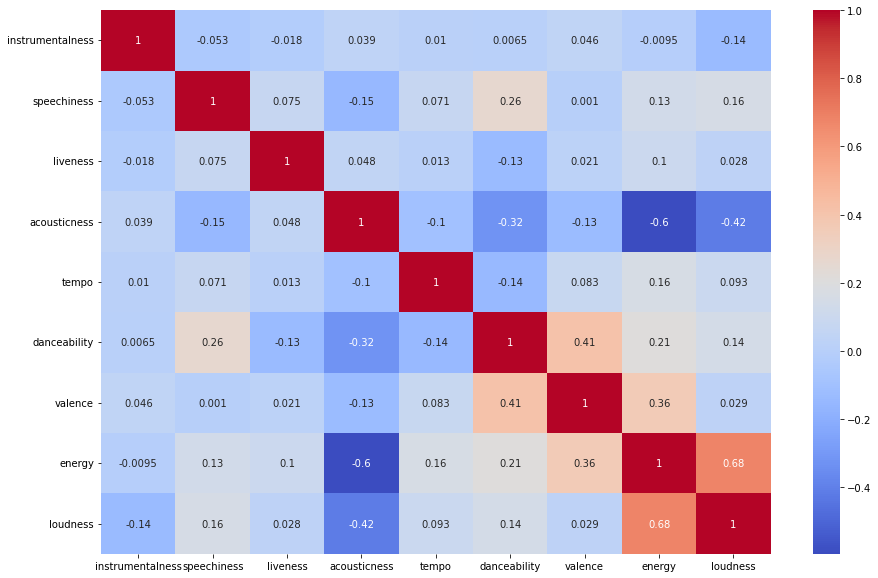

In [33]:
plt.figure(figsize=(15,10)) 
a_corr = sns.heatmap(z.corr(), annot=True, cmap= "coolwarm")

In [34]:
audio = pd.merge(newbb, spotify)
discoveraudio = audio

In [35]:
audio = audio[audio["Week Position"]==1]

In [36]:
audio = audio.drop(columns=['SongID', 'Instance', 'spotify_genre', 'spotify_track_id', 'spotify_track_preview_url', 'spotify_track_explicit', 'spotify_track_album', 'spotify_track_popularity', 'Peak Position'])

In [37]:
plt.figure(figsize=(30,10))
num = audio[["instrumentalness", "speechiness", "liveness", "acousticness","tempo" , "danceability", "valence","energy", "loudness"]]

<Figure size 2160x720 with 0 Axes>

Text(0.5, 1.0, 'Confidence measure attributes of Number 1 Billboard Hot 100 Songs')

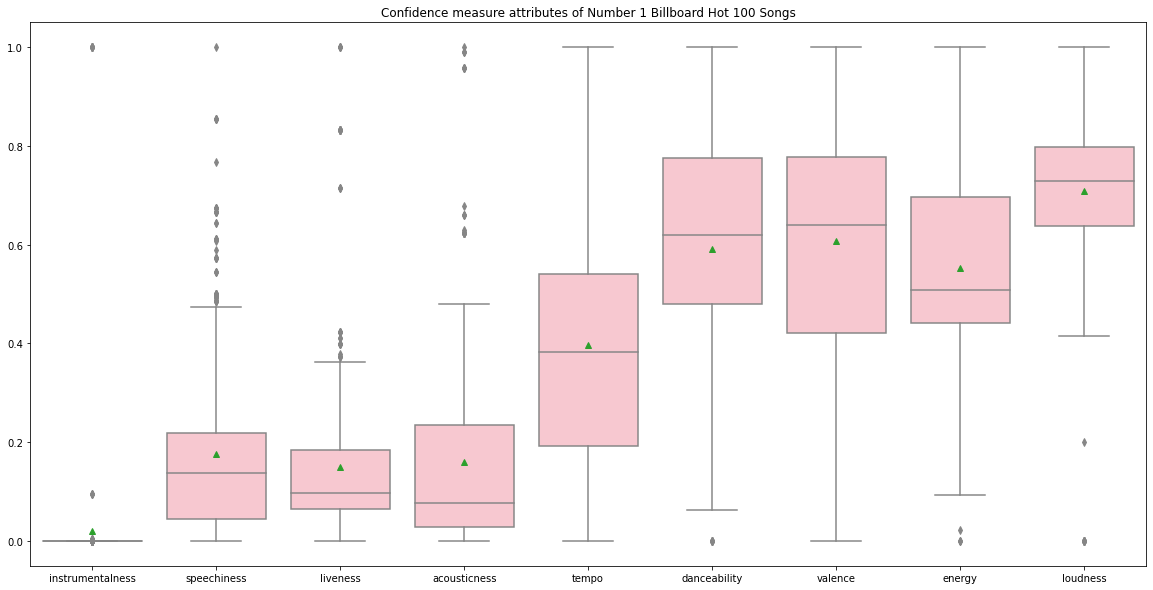

In [38]:
plt.figure(figsize=(20,10))
x = num.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
num = pd.DataFrame(x_scaled)
num.columns = ["instrumentalness", "speechiness", "liveness", "acousticness","tempo" , "danceability", "valence","energy", "loudness"]
n_1 = sns.boxplot(data = num, color = "pink", showmeans=True)
plt.title("Confidence measure attributes of Number 1 Billboard Hot 100 Songs")

In [39]:
discoveraudio.columns

Index(['WeekID', 'Week Position', 'Song', 'Performer', 'SongID', 'Instance',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'year',
       'month', 'day', 'spotify_genre', 'spotify_track_id',
       'spotify_track_preview_url', 'spotify_track_duration_ms',
       'spotify_track_explicit', 'spotify_track_album', 'danceability',
       'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'spotify_track_popularity'],
      dtype='object')

In [40]:
discoveraudio = discoveraudio.drop(columns=['Song',
       'Instance', 'spotify_genre', 'spotify_track_id',
       'spotify_track_preview_url',
       'spotify_track_explicit', 'spotify_track_album',
       'spotify_track_popularity'])

In [41]:
discoveraudio.columns

Index(['WeekID', 'Week Position', 'Performer', 'SongID',
       'Previous Week Position', 'Peak Position', 'Weeks on Chart', 'year',
       'month', 'day', 'spotify_track_duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

In [42]:
discoveraudio = discoveraudio.loc[(discoveraudio["Peak Position"] < 50) & (discoveraudio["Weeks on Chart"] > 20)]

In [43]:
discoveraudio["Peak Position"] = (discoveraudio["Peak Position"] == 1).astype(int)

In [44]:
discoveraudio = discoveraudio.groupby(['SongID','Performer', 'Peak Position',
       'spotify_track_duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'])["Weeks on Chart"].max().reset_index()

In [45]:
y = discoveraudio["Peak Position"]

In [46]:
le = preprocessing.LabelEncoder()
le.fit(discoveraudio["SongID"])
discoveraudio["SongID"] = le.transform(discoveraudio["SongID"])

In [47]:
le.fit(discoveraudio["Performer"])
discoveraudio["Performer"] = le.transform(discoveraudio["Performer"])

In [48]:
discoveraudio = preprocessing.scale(discoveraudio)
discoveraudio = pd.DataFrame(discoveraudio)
discoveraudio.columns = ['SongID', 'Performer', 'Peak Position',
       'spotify_track_duration_ms', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'Weeks on Chart']

discoveraudio = discoveraudio.dropna()

In [49]:
X = discoveraudio.drop(columns= ['Peak Position', "SongID", "Weeks on Chart", "Performer"])

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745 entries, 0 to 744
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   spotify_track_duration_ms  745 non-null    float64
 1   danceability               745 non-null    float64
 2   energy                     745 non-null    float64
 3   key                        745 non-null    float64
 4   loudness                   745 non-null    float64
 5   mode                       745 non-null    float64
 6   speechiness                745 non-null    float64
 7   acousticness               745 non-null    float64
 8   instrumentalness           745 non-null    float64
 9   liveness                   745 non-null    float64
 10  valence                    745 non-null    float64
 11  tempo                      745 non-null    float64
 12  time_signature             745 non-null    float64
dtypes: float64(13)
memory usage: 75.8 KB


Splitting the dataset and building classifiers.

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [52]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
Y_prediction = random_forest.predict(X_test)
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [54]:
random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)

In [55]:
acc_random_forest

99.42

In [56]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)

In [57]:
acc_log

83.88

In [58]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

In [59]:
acc_decision_tree

99.42

In [60]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Decision Tree'],
    'Score': [acc_log, acc_random_forest, acc_decision_tree]})
results = results.sort_values(by='Score', ascending=False)

Text(0.5, 1.0, 'Accuracy of Predictive Models')

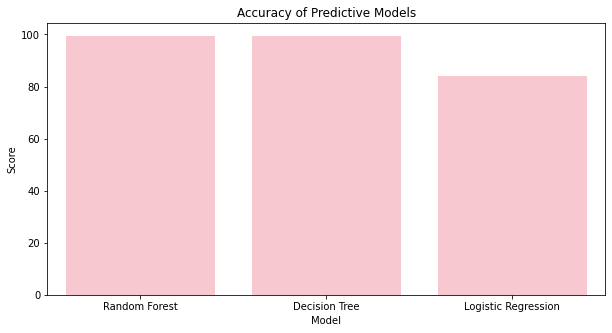

In [61]:
plt.figure(figsize=(10,5))
res_plot = sns.barplot(x = 'Model', y = 'Score', data = results, color = 'pink')
plt.title("Accuracy of Predictive Models")

In [62]:
results

,Model,Score
1,Random Forest,99.42
2,Decision Tree,99.42
0,Logistic Regression,83.88


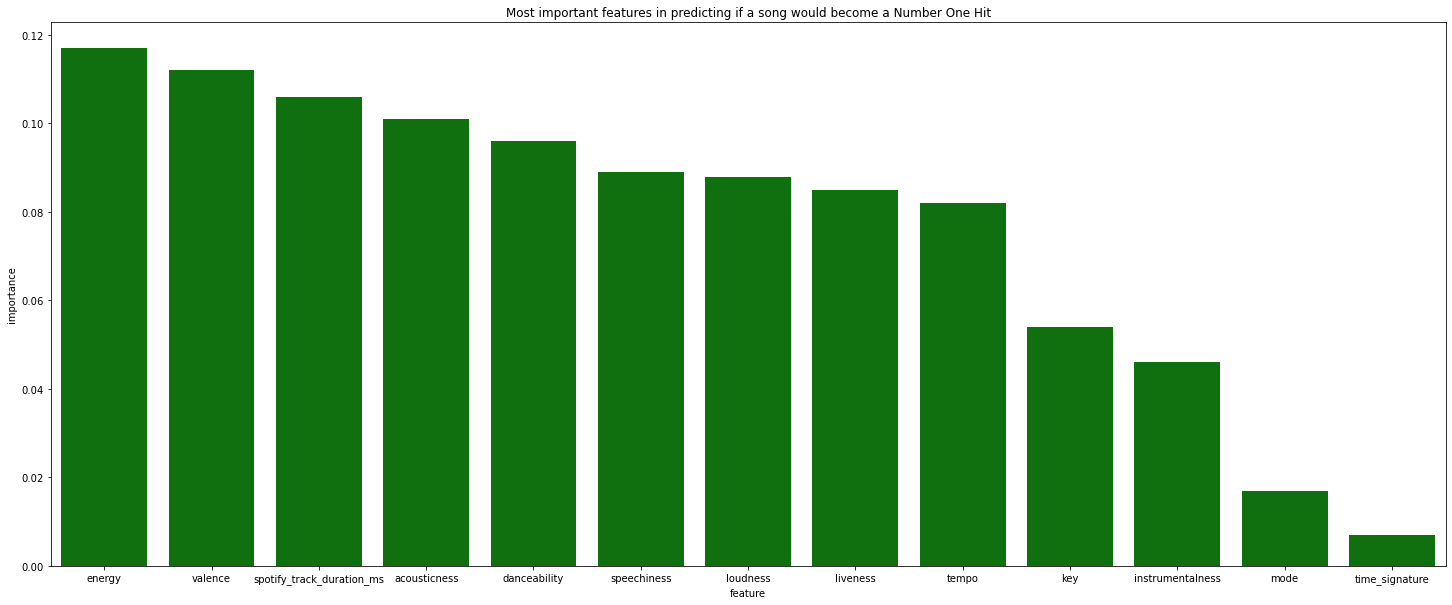

In [63]:
plt.figure(figsize=(25,10))
res_plot = sns.barplot(x = 'feature', y = 'importance', data = importances, color = 'green')
plt.title("Most important features in predicting if a song would become a Number One Hit")
plt.savefig("Most important features in predicting if a song would become a Number One Hit.png")

In [64]:
importances

,feature,importance
2,energy,0.117
10,valence,0.112
0,spotify_track_duration_ms,0.106
7,acousticness,0.101
1,danceability,0.096
6,speechiness,0.089
4,loudness,0.088
9,liveness,0.085
11,tempo,0.082
3,key,0.054
